<hr/>

# Data Mining


<hr/>

<h2><font color="darkblue">Assignment 2</font></h2>

For these problems, you can use any python modules including `sklearn`.

#### Deadline
Homework is due in a week, and should be submitted on Blackboard. Don't wait till the last minute!

####  Work alone!
Please work on your own solving these assignments! 

In [93]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier as KNN


### Problem 1

Create a 2D dataset of 200 items containing 2 classes for a classification exercise, which you expect to work well with Linear Discriminant Analysis but not with a $1$-Nearest Neighbor classifier. 

1. Explain your idea before you start coding. Why will it work with LDA but not with the NN? (2 pts)
2. Generate the feature sets and labels according to your prescription and plot the features colored by the true class memberships (2 pts)
3. Run LDA and NN, and plot the results (2 pts)
4. Summarize you findings with your own words: Did you find what you expected? Why? (1 pt)

Total of 7 points

### 1. Explain idea before coding

KNN works by, for each new point, counting its k closest neighbors by radius, and then labeling the new point essentially by group vote.

LDA works by generating the optimal hyperplane in the data such that the group means are as far apart as possible, and the spread within each group is small.

Thus, if gaussian data are actually separated by a hyperplane, I would expect LDA to work well.
Because gaussian data leaves open the possibility that some values within group A are closer to values in group B than other values in group A, I would expect KNN to not always perform optimally.

### 2. Generate feature sets and labels

In [94]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier as KNN


cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 300, 2
#     np.random.seed(0)
    C = np.array([[0., -0.75], 
                  [0.83, .23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([0, 2])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


#### Plot features colored by true class membership

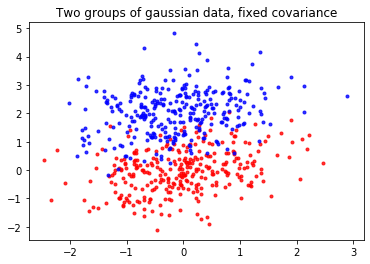

In [95]:
def plot_data(X, y):
    # function shamelessly stolen and hacked together from an sklearn example
#     splot = plt.subplot(2, 2, fig_index)

    X0, X1 = X[y == 0], X[y == 1]

    # class 0
    plt.scatter(X0[:, 0], X0[:, 1], marker='.', color='red', alpha=0.8)

    # class 1
    plt.scatter(X1[:, 0], X1[:, 1], marker='.', color='blue', alpha=0.8)
    
    # title, etc
    plt.title("Two groups of gaussian data, fixed covariance")
    
X, y = dataset_fixed_cov()
plot_data(X, y)

### 3. Run LDA and KNN, plot result

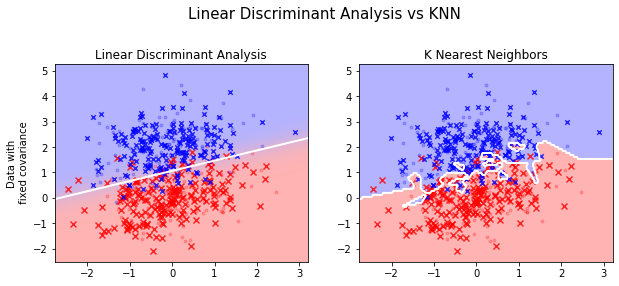

In [96]:
from sklearn.model_selection import train_test_split

# Plot function
def plot_modeled_data(model, X_train, y_train, X_test, y_test, y_pred, fig_index, lda_=False):
    # function shamelessly stolen and hacked together from an sklearn example
    
    # set up plot
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with\n fixed covariance')
    elif fig_index == 2:
        plt.title('K Nearest Neighbors')
    elif fig_index == 3:
        plt.ylabel('Data with\n varying covariances')

    # get datapoints by label
    X0_train, X1_train = X_train[y_train == 0], X_train[y_train == 1]
    X0_test, X1_test = X_test[y_test == 0], X_test[y_test == 1]

    # plot class 0
    plt.scatter(X0_train[:, 0], X0_train[:, 1], marker='.', color='red', alpha=0.2)  # training data
    plt.scatter(X0_test[:, 0], X0_test[:, 1], marker='x', color='red', alpha=0.8)  # testing data

    # plot class 1
    plt.scatter(X1_train[:, 0], X1_train[:, 1], marker='.', color='blue', alpha=0.2)
    plt.scatter(X1_test[:, 0], X1_test[:, 1], marker='x',
                s=20, color='blue', alpha=0.8)  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=0)
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')


    return splot

# split into training and testing groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.65)

lda = LDA()
knn = KNN(n_neighbors=1)

plt.figure(figsize=(10,8), facecolor='white')
plt.suptitle('Linear Discriminant Analysis vs KNN',
             y=0.98, fontsize=15)

for i, model in enumerate([lda, knn]):
    y_pred = model.fit(X_train, y_train).predict(X_test)
    splot = plot_modeled_data(model, X_train=X_train, y_train=y_train, 
                      X_test=X_test, y_test=y_test, y_pred=y_pred, fig_index=i+1)
    plt.axis('tight')
    

### 4. Summarize findings

I divided the data into a training and a testing set, with a large amount of data in the testing set (40% training, 60% testing). Training set data were plotted as dots with low opacity, while testing set data were plotted as X's. The data were colored according to their true class membership. The background color and white lines show regions where new testing data would be marked as belonging to one class membership or another.

The results were as expected. LDA produces a clean line separating the two gaussians, whereas the 1-NN model dramatically overfits in some areas. Its classification, while being largely correct, does not neatly reflect the true relationship between the data.

### Problem 2

In [10]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.datasets import load_digits
digits = load_digits(n_class=5)
[k for k in digits]

['data', 'target', 'target_names', 'images', 'DESCR']

In [11]:
digits.data.shape, digits.target.shape

((901, 64), (901,))

In [12]:
X, y = digits.data, digits.target

### Use 10-fold cross-validation to find the best classifier for handwritten digits 0, 1, 2, 3, 4 in the dataset below.

### 1. Try $k$-NN with different $k$ values (1.5 pts)

In [13]:
# KNN with different # neighbors
scores = []
neighbors = list(range(1, 11))
for i in neighbors:
    knn = KNN(n_neighbors=i)
    _scores = cross_val_score(knn, X, y=y, cv=10)
    scores.append(_scores)

# make dataframe look nice
results = pd.DataFrame(np.array((scores, neighbors)).T, columns=["scores", "neighbors"]).loc[:, ["neighbors", "scores"]]
results = pd.DataFrame(results.scores.tolist(), index=results.neighbors).reset_index().melt(id_vars="neighbors", var_name="run", value_name="score")
results.sort_values(by=["neighbors", "run"], inplace=True)

In [14]:
results.head()

,neighbors,run,score
0,1,0,0.945055
10,1,1,0.988889
20,1,2,1.000000
30,1,3,0.988889
40,1,4,0.988889


#### Plot

Text(0.5, 1.0, 'Scores for KNN training runs with 10-fold cross validation')

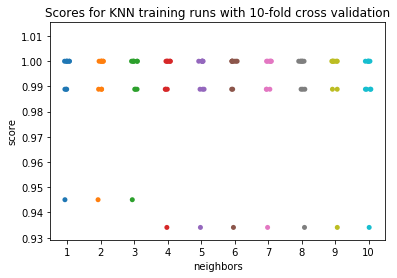

In [15]:
# all either 1.0 or .990
sns.stripplot(x="neighbors", y="score", data=results, jitter=1)
plt.title("Scores for KNN runs with 10-fold cross validation")

In [31]:
best_neighbors = results.groupby("neighbors").mean().sort_values(by='score', ascending=False)
best_neighbors

,score
neighbors,
6,0.991184
9,0.991184
1,0.991172
2,0.991172
3,0.991172
4,0.990073
5,0.990073
7,0.990073
8,0.990073


### 2. Try Gaussian Naive Bayes with different priors - what prior and why? (1.5 pts)

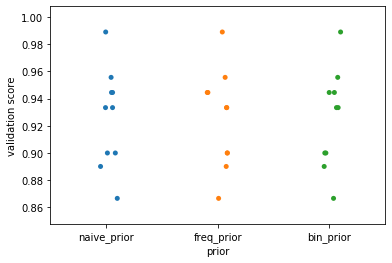

In [33]:
# TODO: check if cross_val_score is using prior properly

from sklearn.naive_bayes import GaussianNB
results = pd.DataFrame()

def run_gnb(X, y, priors=None):
    gnb = GaussianNB(priors=priors)
    _scores = cross_val_score(gnb, X, y=y, cv=10)
    return _scores

# naive prior
results["naive_prior"] = run_gnb(X, y)

# prior = observed frequency in training data
freq_priors = pd.Series(y).value_counts().sort_values(ascending=False)
freq_priors /= sum(freq_priors)
results["freq_prior"] = run_gnb(X, y, priors=freq_priors)

# binary prior for validation
bin_prior = np.array([0, 0, 0, 0, 1])
results["bin_prior"] = run_gnb(X, y, priors=freq_priors)

# plot results
results_m = results.melt(var_name="prior", value_name="validation score")
sns.stripplot(x="prior", y="validation score", data=results_m)

### 3. Try different decision trees (1.5 pts)

In [54]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(figsize=(5, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")


    return plt


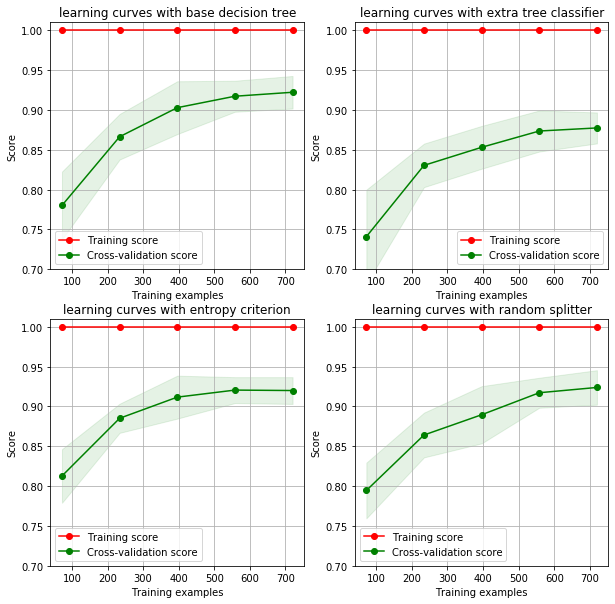

In [59]:
from sklearn import tree
from sklearn.model_selection import learning_curve, ShuffleSplit

clf_base = tree.DecisionTreeClassifier()
clf_extra = tree.ExtraTreeClassifier()
clf_ent = tree.DecisionTreeClassifier(criterion="entropy")
clf_randsplit = tree.DecisionTreeClassifier(splitter="random")

# validate and plot
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

cv = ShuffleSplit(n_splits=10, test_size=0.2)
plot_learning_curve(clf_base, "learning curves with base decision tree", X, y,
                    ylim=(0.7, 1.01), cv=cv, n_jobs=4, axes=axes[0, 0]);

plot_learning_curve(clf_extra, "learning curves with extra tree classifier", X, y,
                    ylim=(0.7, 1.01), cv=cv, n_jobs=4, axes=axes[0, 1]);

plot_learning_curve(clf_ent, "learning curves with entropy criterion", X, y,
                    ylim=(0.7, 1.01), cv=cv, n_jobs=4, axes=axes[1, 0]);

plot_learning_curve(clf_randsplit, "learning curves with random splitter", X, y,
                    ylim=(0.7, 1.01), cv=cv, n_jobs=4, axes=axes[1, 1]);

### 4. Try different random forest classifiers (1.5 pts)

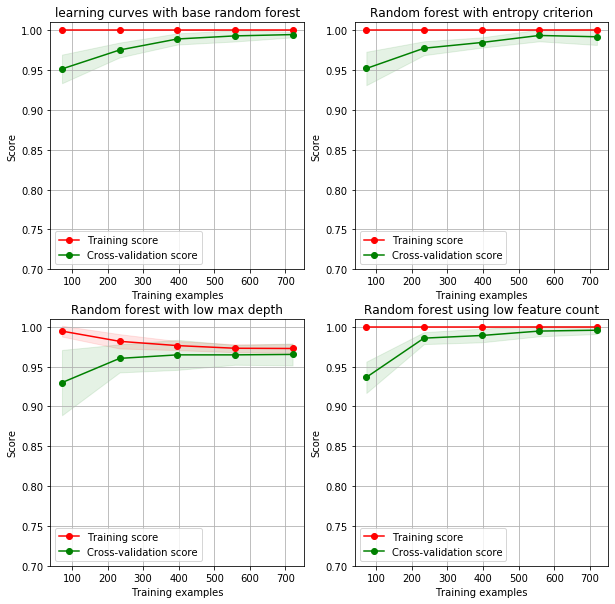

In [73]:
from sklearn.ensemble import RandomForestClassifier

base_rf = RandomForestClassifier()
entropy_rf = RandomForestClassifier(criterion="entropy")
lowdepth_rf = RandomForestClassifier(max_depth=3)
lowfeatures_rf = RandomForestClassifier(max_features=4)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

cv = ShuffleSplit(n_splits=10, test_size=0.2)
plot_learning_curve(base_rf, "learning curves with base random forest", X, y,
                    ylim=(0.7, 1.01), cv=cv, axes=axes[0, 0]);

plot_learning_curve(entropy_rf, "Random forest with entropy criterion", X, y,
                    ylim=(0.7, 1.01), cv=cv, axes=axes[0, 1]);

plot_learning_curve(lowdepth_rf, "Random forest with low max depth", X, y,
                    ylim=(0.7, 1.01), cv=cv, axes=axes[1, 0]);

plot_learning_curve(lowfeatures_rf, "Random forest using low feature count", X, y,
                    ylim=(0.7, 1.01), cv=cv, axes=axes[1, 1]);

### 5. Which classifer is the best among the ones you tried? (1 pt)

In [79]:
# best from KNN runs
knn_best = best_neighbors.index[0]
knn = KNN(n_neighbors = knn_best)

# best from gaussian NB
gnb = GaussianNB()

# best forest (forest always better than tree)
rf = base_rf

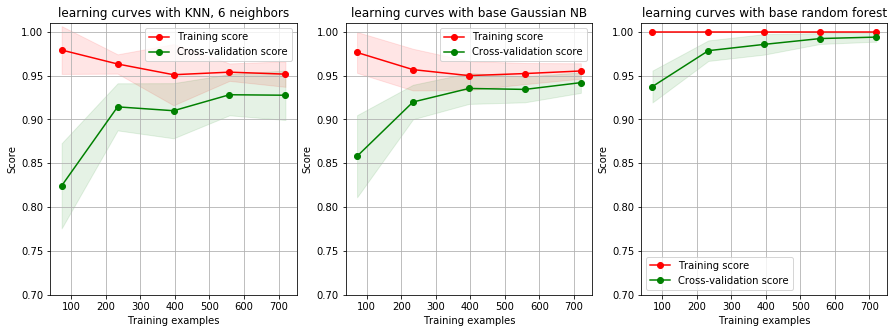

In [79]:
# plot learning curves
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

cv = ShuffleSplit(n_splits=10, test_size=0.2)
plot_learning_curve(gnb, f"learning curves with KNN, {knn_best} neighbors", X, y,
                    ylim=(0.7, 1.01), cv=cv, axes=axes[0]);
plot_learning_curve(gnb, f"learning curves with base Gaussian NB", X, y,
                    ylim=(0.7, 1.01), cv=cv, axes=axes[1]);
plot_learning_curve(rf, "learning curves with base random forest", X, y,
                    ylim=(0.7, 1.01), cv=cv, axes=axes[2]);

### 6. Visualize the (5-by-5) confusion matrix for the best classifier (1 pt)